**一、加载数据**

In [0]:
# 加载数据
import pickle

# 数据集所在的文件位置
training_file = "/content/drive/traffic-signs-data/train.p"
validation_file = "/content/drive/traffic-signs-data/valid.p"
testing_file = "/content/drive/traffic-signs-data/test.p"

# 打开文件
with open(training_file,mode="rb") as f:
  train = pickle.load(f)
with open(validation_file,mode="rb") as f:
  valid = pickle.load(f)
with open(testing_file,mode="rb") as f:
  test = pickle.load(f)

# 获取数据集的特征及标签数据
X_train,y_train = train["features"],train["labels"]
X_valid,y_valid = valid["features"],valid["labels"]
X_test,y_test = test["features"],test["labels"]

In [0]:
# 查看数据量
print("Number of training examples =",X_train.shape[0])
print("Number of validtion examples =",X_valid.shape[0])
print("Number of testing examples=",X_test.shape[0])

# 查看数据格式
print("Image data shape =",X_train.shape[1:])

Number of training examples = 34799
Number of validtion examples = 4410
Number of testing examples= 12630
Image data shape = (32, 32, 3)


In [0]:
# 查看数据的标签的数量
import numpy as np

sum = np.unique(y_train)
print("number of classes =",len(sum))

number of classes = 43


In [0]:
# 查看标签数据
import pandas as pd

sign_names_file = "/content/drive/traffic-signs-data/signnames.csv"
sign_names = pd.read_csv(sign_names_file)
print(sign_names)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [0]:
# 定义将标签id转换成name的函数
sign_names = np.array(sign_names)
def id_to_name(id):
  return sign_names[id][1]

In [0]:
# 验证是否id_to_name函数
id_to_name(0)

'Speed limit (20km/h)'

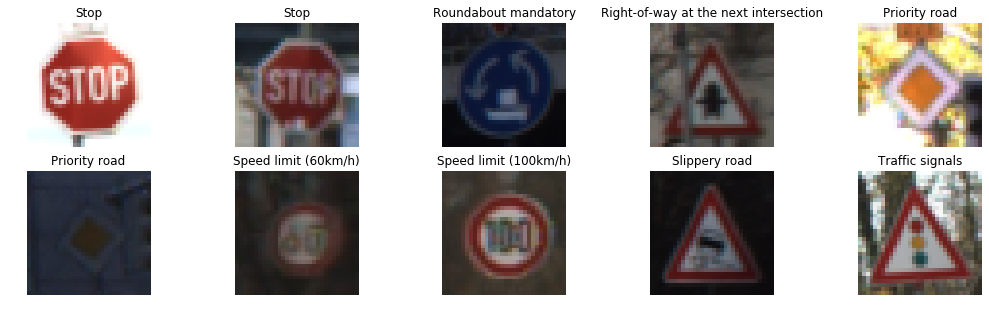

In [0]:
# 绘制交通标志图
import matplotlib.pyplot as plt
%matplotlib inline

fig,axes = plt.subplots(2,5,figsize=(18,5))
ax_array = axes.ravel()
for ax in ax_array:
  index = np.random.randint(0,len(X_train))
  ax.imshow(X_train[index])
  ax.axis("off")
  ax.set_title(id_to_name(y_train[index]))
plt.show()

(34799, 32, 32, 3)
(34799,)


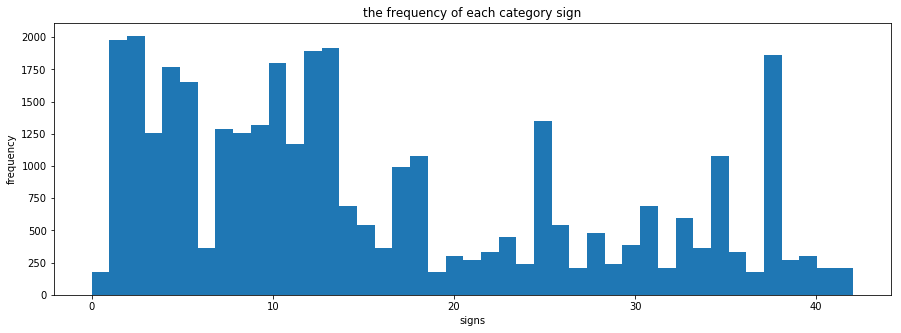

In [0]:
# 直方图来展示图像训练集的各个类别的分布情况
n_classes = len(sum)
def plot_y_train_hist():
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,1,1)
    hist = ax.hist(y_train,bins = n_classes)
    ax.set_title("the frequency of each category sign")
    ax.set_xlabel("signs")
    ax.set_ylabel("frequency")
    plt.show()
    return hist

print(X_train.shape)
print(y_train.shape)
hist = plot_y_train_hist()

(51690, 32, 32, 3)
(51690,)


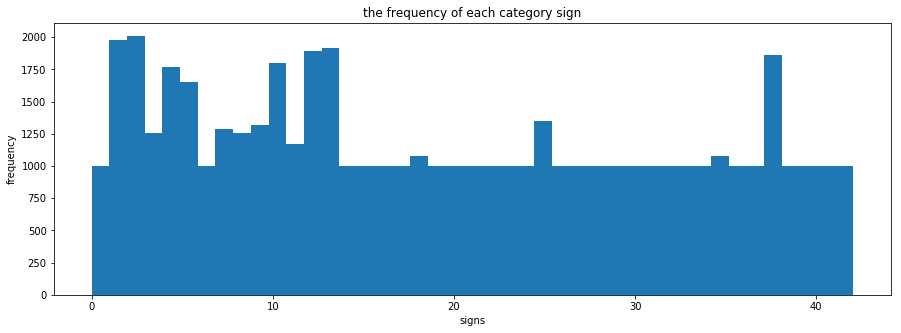

(array([1000., 1980., 2010., 1260., 1770., 1650., 1000., 1290., 1260.,
        1320., 1800., 1170., 1890., 1920., 1000., 1000., 1000., 1000.,
        1080., 1000., 1000., 1000., 1000., 1000., 1000., 1350., 1000.,
        1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1080.,
        1000., 1000., 1860., 1000., 1000., 1000., 1000.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <a list of

In [0]:
# 数据重采样，使样本个数分配均匀
bin_edges = hist[1]
bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
for i in range(len(bin_centers)):
    if hist[0][i] < 1000:
        train_data = [X_train[j] for j in range(len(y_train)) if y_train[j] == i]
        need_resample_num = int(1000 - hist[0][i])
        new_data_x = [np.copy(train_data[np.random.randint(len(train_data))]) for k in range(need_resample_num)]
        new_data_y = [i for x in range(need_resample_num)]
        X_train = np.vstack((X_train, np.array(new_data_x)))
        y_train = np.hstack((y_train, np.array(new_data_y)))
print(X_train.shape)
print(y_train.shape)
plot_y_train_hist()

**二、数据预处理**

(32, 32, 3)


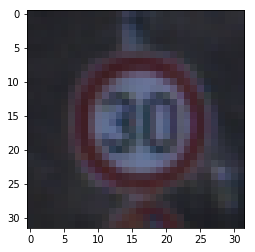

In [0]:
# 源图像
src = X_train[4000]
plt.imshow(src)
print(src.shape)

(32, 32)


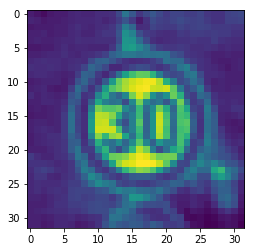

In [0]:
# 转为灰度图像
import cv2

dst = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)
plt.imshow(dst)
print(dst.shape)

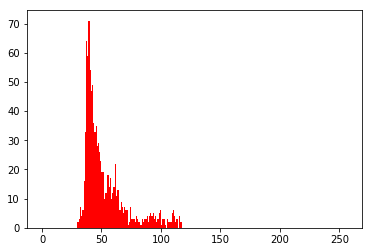

In [0]:
# 灰度图的直方图
plt.hist(dst.ravel(),256,[0,256],color="r")
plt.show()

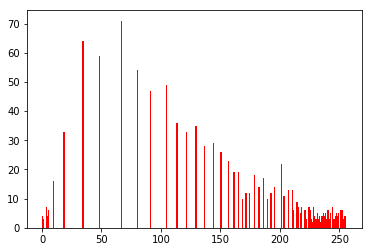

In [0]:
# 灰度图的直方图均衡化
dst2 = cv2.equalizeHist(dst)
plt.hist(dst2.ravel(),256,[0,256],color="r")
plt.show()

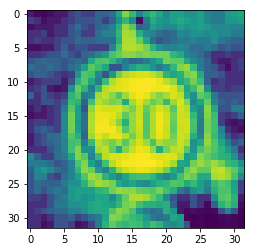

In [0]:
# 查看直方图均衡化的图片
plt.imshow(dst2)

In [0]:
# 增加维度
print(dst2.shape)
dst3 = np.expand_dims(dst2,2)
print(dst3.shape)

(32, 32)
(32, 32, 1)


In [0]:
# 归一化处理
dst4 = np.array(dst3,dtype=np.float32)
dst4 = (dst4-128)/128

In [0]:
# 查看一下归一化处理后的图像数据
dst4[0]

array([[-0.859375 ],
       [-0.9609375],
       [-0.9765625],
       [-0.9296875],
       [-0.859375 ],
       [-0.859375 ],
       [-0.625    ],
       [-0.484375 ],
       [-0.625    ],
       [-0.625    ],
       [-0.375    ],
       [-0.375    ],
       [-0.2890625],
       [ 0.171875 ],
       [ 0.6171875],
       [ 0.3359375],
       [-0.1171875],
       [ 0.171875 ],
       [ 0.3359375],
       [ 0.171875 ],
       [-0.0546875],
       [ 0.125    ],
       [ 0.125    ],
       [ 0.0078125],
       [ 0.0078125],
       [ 0.125    ],
       [-0.1171875],
       [-0.1875   ],
       [-0.1875   ],
       [ 0.0625   ],
       [ 0.125    ],
       [ 0.171875 ]], dtype=float32)

In [0]:
# 封装数据预处理的方法
import cv2

def preprocess_features(X, equalize_hist=True):
    normalized_X = []
    for i in range(len(X)):
        # Convert from RGB to YUV
        yuv_img = cv2.cvtColor(X[i], cv2.COLOR_RGB2YUV)
        yuv_img_v = X[i][:, :, 0]
        # equalizeHist
        yuv_img_v = cv2.equalizeHist(yuv_img_v)
        # expand_dis
        yuv_img_v = np.expand_dims(yuv_img_v, 2)
        normalized_X.append(yuv_img_v)
    # normalize
    normalized_X = np.array(normalized_X, dtype=np.float32)
    normalized_X = (normalized_X-128)/128
    # normalized_X /= (np.std(normalized_X, axis=0) + np.finfo('float32').eps)
    return normalized_X

In [0]:
# 对数据集整体进行处理
X_train_normalized = preprocess_features(X_train)
X_valid_normalized = preprocess_features(X_valid)
X_test_normalized = preprocess_features(X_test)

In [0]:
# 将数据集打乱
from sklearn.utils import shuffle
X_train_normalized,y_train = shuffle(X_train_normalized,y_train)

Using TensorFlow backend.


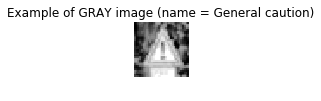

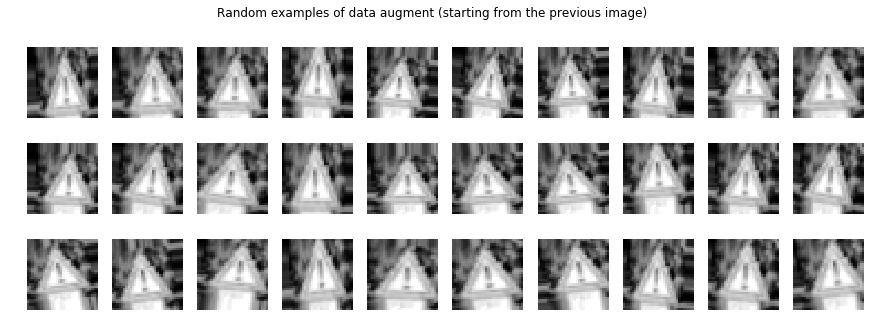

In [0]:
# 数据增强
from keras.preprocessing.image import ImageDataGenerator

# 图像数据生成器
image_datagen = ImageDataGenerator(rotation_range = 10.,
                                   zoom_range = 0.2,
                                   width_shift_range =  0.08,
                                   height_shift_range = 0.08
                                  )

# 从训练集随意选取一张图片
index = np.random.randint(0, len(X_train_normalized))
img = X_train_normalized[index]

# 展示原始图片
plt.figure(figsize=(1, 1))
plt.imshow(np.squeeze(img), cmap="gray")
plt.title('Example of GRAY image (name = {})'.format(id_to_name(y_train[index])))
plt.axis('off')
plt.show()

# 展示数据增强生成的图片
fig, ax_array = plt.subplots(3, 10, figsize=(15, 5))
for ax in ax_array.ravel():
    images = np.expand_dims(img, 0)
    # np.expand_dims(img, 0) means add dim
    augmented_img, _ = image_datagen.flow(np.expand_dims(img, 0), np.expand_dims(y_train[index], 0)).next()
    #augmented_img=preprocess_features(augmented_img)
    ax.imshow(augmented_img.squeeze(), cmap="gray")
    ax.axis('off')
plt.suptitle('Random examples of data augment (starting from the previous image)')
plt.show()

In [0]:
print("Number of training examples =",X_train.shape[0])

Number of training examples = 51690


In [0]:
# 对标签数据进行one-hot编码
from keras.utils  import np_utils
print("Shape before one-hot encoding:",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_valid = np_utils.to_categorical(y_valid,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding:",Y_train.shape)

Shape before one-hot encoding: (51690,)
Shape after one-hot encoding: (51690, 43)


In [0]:
print(y_train[0])
print(Y_train[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**三、交通标志牌的识别模型搭建**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
## Feature Extraction
# 第1层卷积，32个3x3的卷积核 ，激活函数使用 relu
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 input_shape=X_train_normalized.shape[1:]))

# 第2层卷积，64个3x3的卷积核，激活函数使用 relu
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# 最大池化层，池化窗口 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout 25% 的输入神经元
model.add(Dropout(0.25))

# 将 Pooled feature map 摊平后输入全连接网络
model.add(Flatten())

## Classification
# 全联接层
model.add(Dense(128, activation='relu'))

# Dropout 50% 的输入神经元
model.add(Dropout(0.5))

# 使用 softmax 激活函数做多分类，输出各类别的概率
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# 查看模型结构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
# 编译模型
model.compile(loss="mse",
              metrics=["accuracy"],
              optimizer="rmsprop")

In [0]:
# 模型可视化
from keras.utils.vis_utils import plot_model
MODEL_VIS_FILE = 'traffic_classfication' + '.png'
plot_model(model, to_file=MODEL_VIS_FILE, show_shapes=True)

In [0]:
# 训练模型
history = model.fit(X_train_normalized,
                    Y_train,
                    batch_size=256,
                    epochs=60,
                    verbose=2,
                    validation_data=(X_valid_normalized,Y_valid))                    


Instructions for updating:
Use tf.cast instead.
Train on 51690 samples, validate on 4410 samples
Epoch 1/60
 - 7s - loss: 0.0121 - acc: 0.5727 - val_loss: 0.0043 - val_acc: 0.8748
Epoch 2/60
 - 4s - loss: 0.0038 - acc: 0.8884 - val_loss: 0.0025 - val_acc: 0.9206
Epoch 3/60
 - 4s - loss: 0.0023 - acc: 0.9346 - val_loss: 0.0020 - val_acc: 0.9401
Epoch 4/60
 - 4s - loss: 0.0016 - acc: 0.9531 - val_loss: 0.0017 - val_acc: 0.9469
Epoch 5/60
 - 4s - loss: 0.0013 - acc: 0.9638 - val_loss: 0.0015 - val_acc: 0.9580
Epoch 6/60
 - 4s - loss: 0.0010 - acc: 0.9711 - val_loss: 0.0013 - val_acc: 0.9615
Epoch 7/60
 - 4s - loss: 9.0123e-04 - acc: 0.9741 - val_loss: 0.0012 - val_acc: 0.9639
Epoch 8/60
 - 4s - loss: 7.4964e-04 - acc: 0.9786 - val_loss: 0.0012 - val_acc: 0.9633
Epoch 9/60
 - 4s - loss: 6.5788e-04 - acc: 0.9810 - val_loss: 0.0011 - val_acc: 0.9692
Epoch 10/60
 - 4s - loss: 5.8175e-04 - acc: 0.9838 - val_loss: 0.0012 - val_acc: 0.9658
Epoch 11/60
 - 4s - loss: 5.3220e-04 - acc: 0.9850 - val

In [0]:
# 保存训练过程
history.history['acc']

[0.5727413425341314,
 0.8884116850662195,
 0.9346101759249893,
 0.9531243954527698,
 0.9638421358211655,
 0.9710775777412166,
 0.9741342619508303,
 0.97856451925629,
 0.9810214740391925,
 0.9837686206321694,
 0.9850067710041608,
 0.9873283032131139,
 0.987521764369093,
 0.9881408396231226,
 0.9901915262759735,
 0.9899206808490203,
 0.9900754497991722,
 0.9911394852622377,
 0.9916811761092255,
 0.9921261364520231,
 0.9922615591620403,
 0.9920487521787427,
 0.9933062487908686,
 0.9934803635752577,
 0.9939446700198158,
 0.9931901721849181,
 0.9943122459486528,
 0.9939253239134429,
 0.9937512089975984,
 0.9943702842562405,
 0.9941961693380897,
 0.9947572064229058,
 0.9946217835768207,
 0.9948732828997071,
 0.9951441283243541,
 0.995414973749001,
 0.9952408588331565,
 0.995028051713791,
 0.9951054361231393,
 0.9960147029058826,
 0.9955697426991528,
 0.9957051652754084,
 0.995898626426775,
 0.9961307796502071,
 0.9961694718537282,
 0.995743857612691,
 0.9963822789707873,
 0.9965370477894838,

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import tensorflow.gfile as gfile

history_dir = "/content/drive/history/loss/"
history_format = ".history"
filename_str = "{}traffic_{}_{}_bs_{}_epochs_{}{}"
optimizer="rmsprop"
loss="mse"
batch_size = 256
epochs = 60

# 训练记录文件
history_file = filename_str.format(history_dir, optimizer, loss, str(batch_size), str(epochs), history_format)


In [0]:
if gfile.Exists(history_dir) == False:
    gfile.MakeDirs(history_dir)

with open(history_file, 'wb') as f:
    pickle.dump(history.history, f)

In [0]:
print(history_file)

/content/drive/history/loss/traffic_rmsprop_binary_crossentropy_bs_256_epochs_60.history


**优化器对比**

In [0]:
# 定义过程可视化方法
def plot_training(history=None, metric='acc', title='Model Accuracy', loc='lower right'):
    model_list = []
    fig = plt.figure(figsize=(10, 8))
    for key, val in history.items():
        model_list.append(key.replace(history_dir, '').rstrip('.history'))
        plt.plot(val[metric])

    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(model_list, loc=loc)
    plt.show()

In [0]:
import glob

# 加载预训练模型
history_dir = "/content/drive/history/optimizer/"
history = {}
for filename in glob.glob(history_dir + '*.history'):
    with open(filename, 'rb') as f:
        history[filename] = pickle.load(f)

In [0]:
for key, val in history.items():
    print(key.replace(history_dir, '').rstrip('.history'), val.keys())

traffic_adam_binary_crossentropy_bs_256_epochs_60 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
traffic_adadelta_binary_crossentropy_bs_256_epochs_60 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
traffic_adagrad_binary_crossentropy_bs_256_epochs_60 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
traffic_rmsprop_binary_crossentropy_bs_256_epochs_60 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


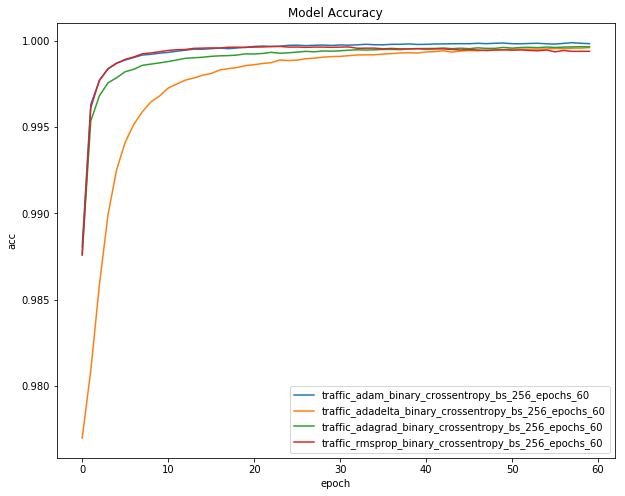

In [0]:
# 准确率变化（训练集）
plot_training(history)

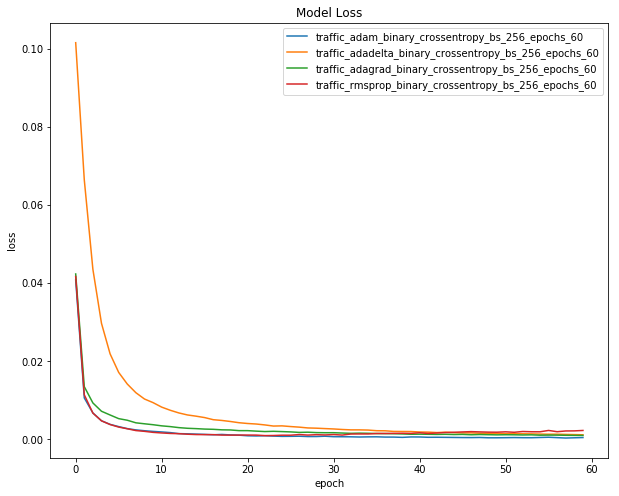

In [0]:
# 损失值变化（训练集）
plot_training(history, metric='loss', title='Model Loss', loc='upper right')

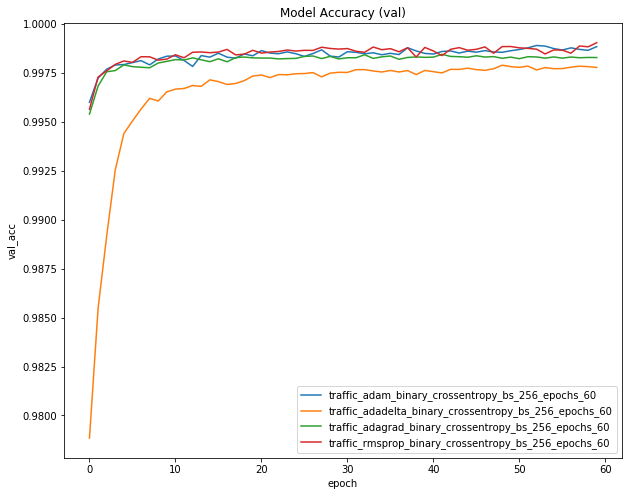

In [0]:
# 准确率变化（测试集）
plot_training(history, metric='val_acc', title='Model Accuracy (val)')

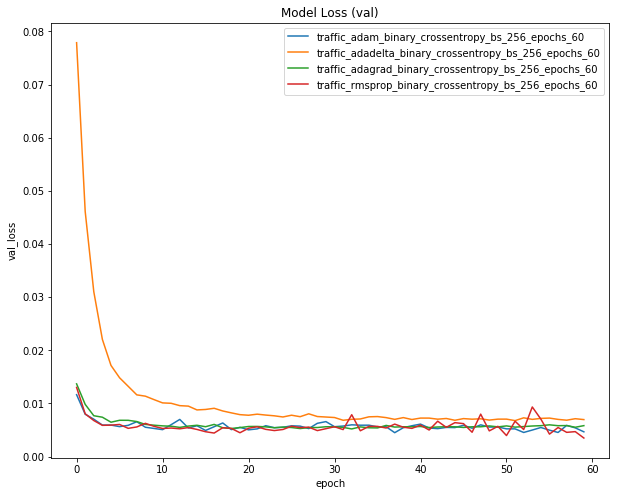

In [0]:
# 损失值变化（测试集）
plot_training(history, metric='val_loss', title='Model Loss (val)', loc='upper right')

**不同损失函数的对比”**

In [0]:
def plot_training(history=None, metric='acc', title='Model Accuracy', loc='lower right'):
    model_list = []
    fig = plt.figure(figsize=(10, 8))
    for key, val in history.items():
        model_list.append(key.replace(history_dir, '').rstrip('.history'))
        plt.plot(val[metric])

    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(model_list, loc=loc)
    plt.show()

In [0]:
import glob

# 加载预训练模型
history_dir = "/content/drive/history/loss/"
history = {}
for filename in glob.glob(history_dir + '*.history'):
    with open(filename, 'rb') as f:
        history[filename] = pickle.load(f)

In [0]:
for key, val in history.items():
    print(key.replace(history_dir, '').rstrip('.history'), val.keys())

traffic_rmsprop_binary_crossentropy_bs_256_epochs_60 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
traffic_rmsprop_categorical_crossentropy_bs_256_epochs_60 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
traffic_rmsprop_poisson_bs_256_epochs_60 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
traffic_rmsprop_mse_bs_256_epochs_60 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


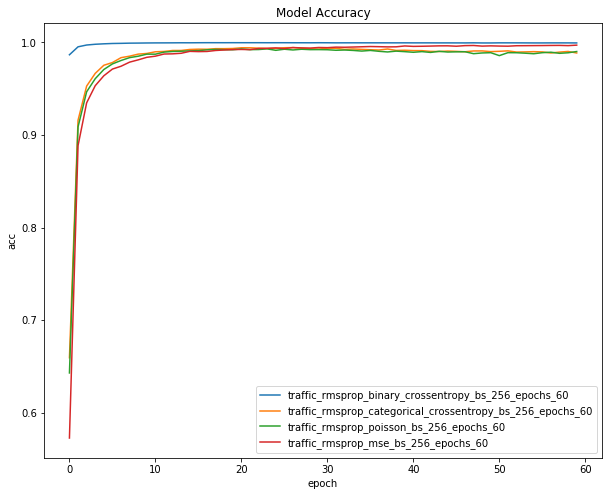

In [0]:
# 准确率变化（训练集）
plot_training(history)

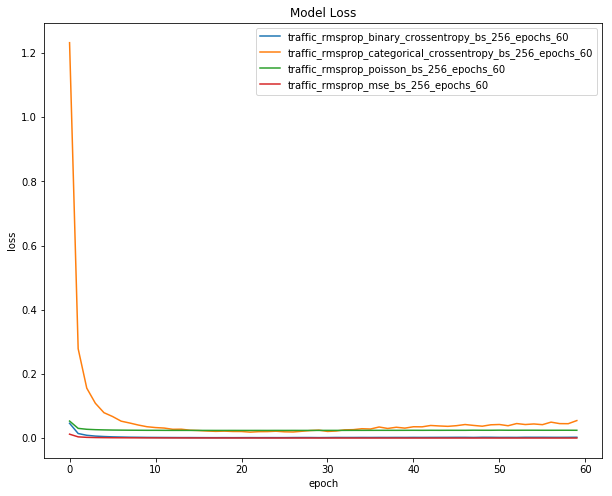

In [0]:
# 损失值变化（训练集）
plot_training(history, metric='loss', title='Model Loss', loc='upper right')

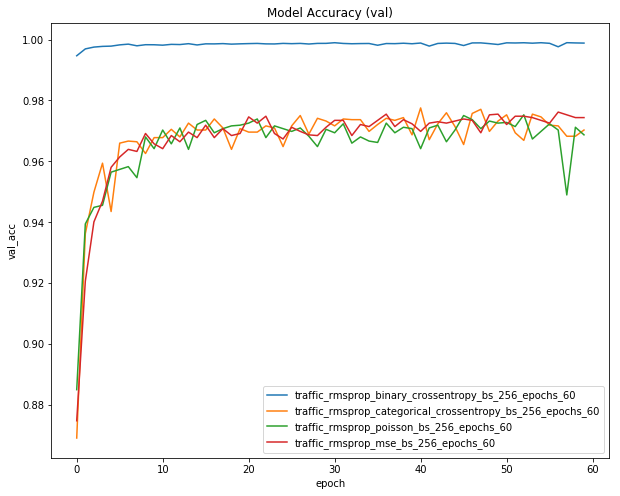

In [0]:
# 准确率变化（测试集）
plot_training(history, metric='val_acc', title='Model Accuracy (val)')

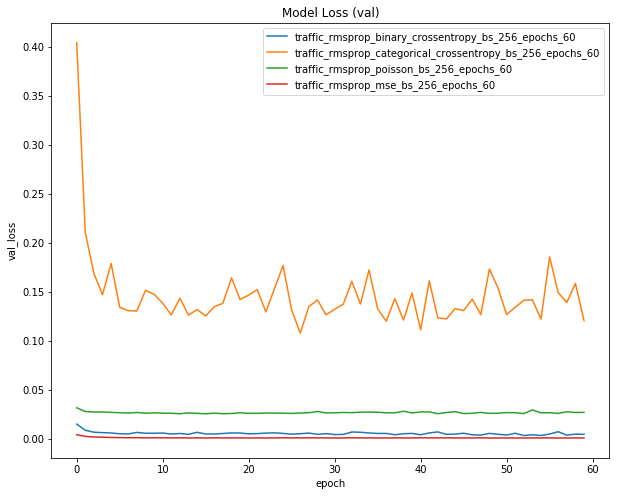

In [0]:
# 损失值变化（测试集）
plot_training(history, metric='val_loss', title='Model Loss (val)', loc='upper right')